In [4]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
from ssl_fc import Encoder1, Encoder2, Decoder
from m2 import SSL_M2
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from tensorflow.python.framework import dtypes
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
from dataset import DataSet
mnist = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
def split_data(dataset, num_labeled):
    """
    Split dataset into two datasets
    """
    n = dataset.num_examples
    x, y = dataset.next_batch(n)
    x1 = x[xrange(num_labeled),:]
    y1 = y[xrange(num_labeled),:]
    x2 = x[xrange(num_labeled, n),:]
    y2 = y[xrange(num_labeled, n),:]
    d1 = DataSet(x1, y1, dtype=dtypes.float32, reshape=False)
    d2 = DataSet(x2, y2, dtype=dtypes.float32, reshape=False)
    return d1, d2

In [7]:
# Split dataset into labeled and unlabeled
# Easy: using many labeled examples
labeled, unlabeled = split_data(mnist.train, 30000)

In [8]:
tf.reset_default_graph()

In [ ]:
# Train
#sess = tf.InteractiveSession()
#build_encoder1 = Encoder1(200)
#build_encoder2 = Encoder2(200)
#build_decoder = Decoder(200)

#model = SSL_M2(sess, build_encoder1, build_encoder2, build_decoder, labeled, unlabeled,
#            batch_size = 100, z_dim = 30, x_dim = 784, y_dim=10, alpha=55000./10,
#           learning_rate = 0.001, num_epochs = 50, load=False,
#          checkpoint_name='SSL_M2_checkpoint_10000'
#          checkpoint_name='SSL_M2_checkpoint_30000'
#          checkpoint_name='SSL_M2_checkpoint_50000'
#)
#model.train()

In [9]:
#Load
sess = tf.InteractiveSession()
build_encoder1 = Encoder1(200)
build_encoder2 = Encoder2(200)
build_decoder = Decoder(200)

model = SSL_M2(sess, build_encoder1, build_encoder2, build_decoder, labeled, unlabeled,
            batch_size = 100, z_dim = 30, x_dim = 784, y_dim=10, alpha=55000./10,
           learning_rate = 0.005, num_epochs = 20, load=True,
        #load_file = "checkpoints/SSL_M2_checkpoint_10000"
               load_file = "checkpoints/SSL_M2_checkpoint_30000"
               #load_file = "checkpoints/SSL_M2_checkpoint_50000"
              )

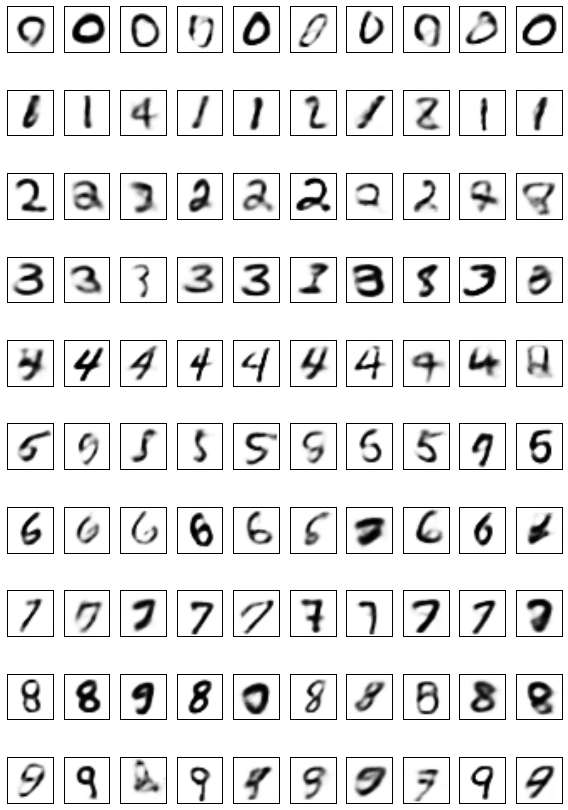

In [10]:
#images, info = mnist.test.next_batch(100)
num_examples = 10

labels = np.repeat(np.identity(10), num_examples, axis=0)
generated_images = model.generate(num=100, labels=labels)

num_show = 5
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/SSL_generate_10000')
plt.savefig('images/SSL_generate_30000')
#plt.savefig('images/SSL_generate_50000')
plt.show()

In [11]:
# Classify validation images
x_val, y_val = mnist.validation.next_batch(100)
y_pred = model.classify(x_val)
y_val = np.argmax(y_val, axis=1)
print np.sum(y_pred == y_val)/100.

0.4


In [ ]:
sess.close()